In [1]:
pip install pandas seaborn matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_df = pd.read_csv('/content/gender_submission.csv')

In [5]:
# Data Cleaning
# Check for missing values in the training set
missing_values = train_df.isnull().sum()
print("Missing Values in Train Set:\n", missing_values)

Missing Values in Train Set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Fill missing 'Age' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
# Fill missing 'Embarked' with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
# Drop the 'Cabin' column due to too many missing values
train_df.drop(columns=['Cabin'], inplace=True)

In [7]:
# Correct data types
train_df['Pclass'] = train_df['Pclass'].astype('category')

In [8]:
# Remove duplicates
train_df.drop_duplicates(inplace=True)

In [9]:
# Exploratory Data Analysis (EDA)
# Summary Statistics
print(train_df.describe(include='all'))

        PassengerId    Survived  Pclass                     Name   Sex  \
count    891.000000  891.000000   891.0                      891   891   
unique          NaN         NaN     3.0                      891     2   
top             NaN         NaN     3.0  Braund, Mr. Owen Harris  male   
freq            NaN         NaN   491.0                        1   577   
mean     446.000000    0.383838     NaN                      NaN   NaN   
std      257.353842    0.486592     NaN                      NaN   NaN   
min        1.000000    0.000000     NaN                      NaN   NaN   
25%      223.500000    0.000000     NaN                      NaN   NaN   
50%      446.000000    0.000000     NaN                      NaN   NaN   
75%      668.500000    1.000000     NaN                      NaN   NaN   
max      891.000000    1.000000     NaN                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  
count   891.000000  891.000000  891.0

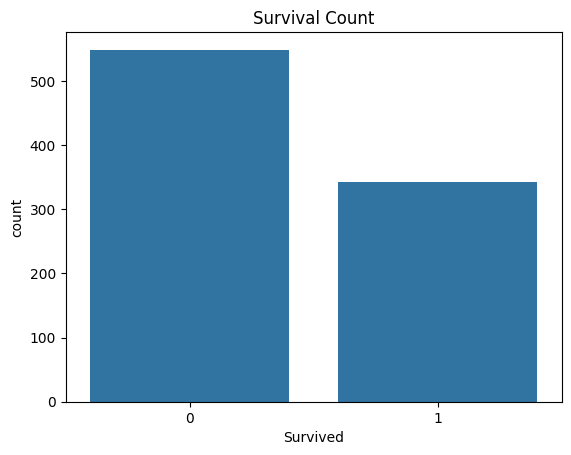

In [10]:
# Visualizations
# Survived count plot
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

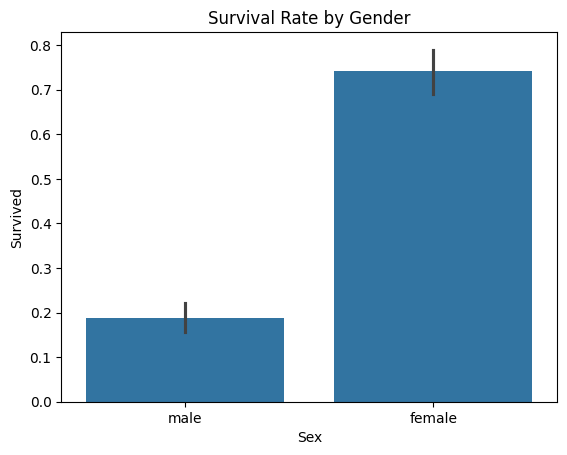

In [11]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()


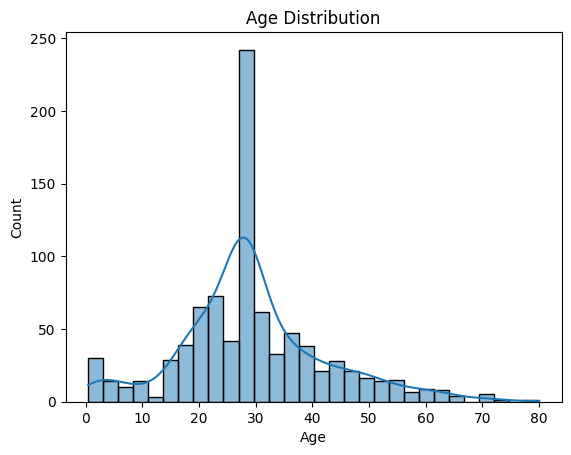

In [12]:
# Age distribution
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

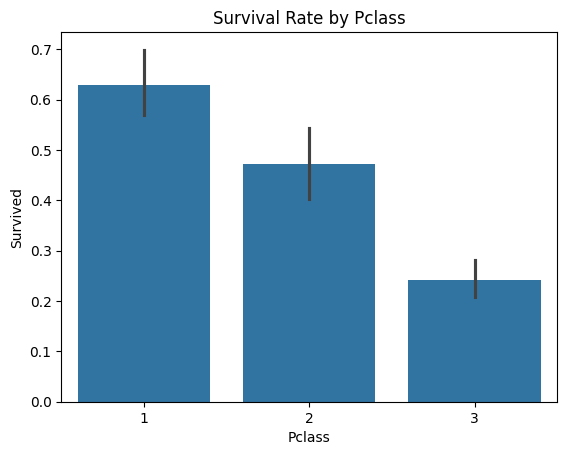

In [13]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

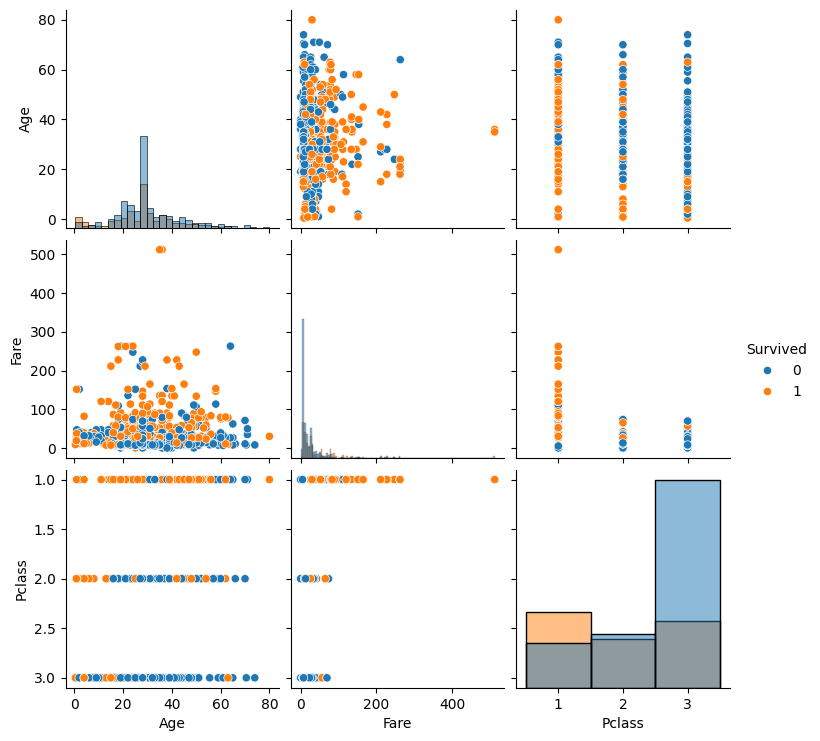

In [15]:
# Pairplot to see relationships between features
sns.pairplot(train_df, hue='Survived', vars=['Age', 'Fare', 'Pclass'], diag_kind='hist') # Change diag_kind to 'hist'
plt.show()